# Welsh Powell Implementation w/ NetworkX 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def welshPowell(G):

    orderFull = sorted(G.degree, key=lambda x: x[1], reverse=True) #order vertices max to min degree

    #get just vertices in order
    order = []
    for i in range(len(orderFull)):
        order.append(orderFull[i][0])

    colorings = {}
    Color = 0

    #Welsh Powell Algorithm
    for vertex in order: #iterate through from max to min degree
        if vertex not in colorings: #only if vertex not already colored
            colorings.update({vertex: Color}) #color the vertex

            #block is to check for other vertices we can color this color
            for candidateVertex in order: #check from max to min degree
                if candidateVertex not in colorings: #only if vertex not already colored
                    isConnected = False #reset boolean

                    #check if the candidateVertex can be colored this color
                    #can't be (isConnected = True) if it's connected to a vertex already colored this color
                    for alreadyColored in colorings:
                        if candidateVertex in list(G.neighbors(alreadyColored)) and colorings[alreadyColored] == Color:
                            isConnected = True

                    #color vertex if allowed
                    if not isConnected:
                        colorings.update({candidateVertex: Color})
            Color+=1

    #make color list same order as nodes in graph for Networkx
    nodeList = list(G.nodes())
    final_colorings = {}
    for node in nodeList:
        final_colorings.update({node: colorings[node]})

    color_options = ['red', 'blue', 'green', 'magenta', 'brown', 'gray',
                    'olive', 'palegreen', 'pink', 'dodgerblue', 'slateblue',
                    'indigo', 'lavender', 'seagreen', 'teal', 'peachpuff', 'rosybrown']
    color_map = []
    for vertex in final_colorings:
        color_map.append(color_options[colorings[vertex]])

    nx.draw_circular(G, node_color = color_map)
    plt.show()

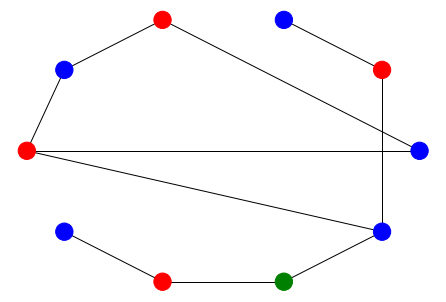

In [4]:
#create graph
# G = nx.Graph()
# e_list = [('A', 'C'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('B', 'E'),('E', 'F'), ('F', 'G')]
# G.add_edges_from(e_list)
G = nx.watts_strogatz_graph(10, 2, .5)
welshPowell(G)